In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from data_loader import data_loader_noH
import pickle
from utils import params

In [50]:
data = np.load('Data/X_red_10stations.npy')
#data = data[:,[0,1,2,3,5,6]]

In [51]:
data_red = data[:500,:]

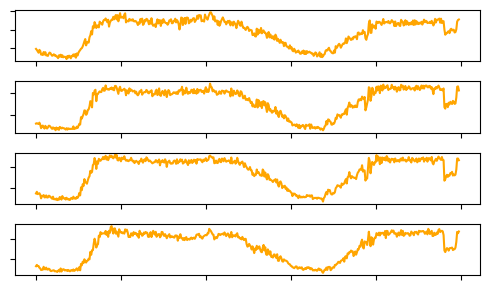

In [52]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 3))
for i in range(4):
    axs[i].plot(100*data_red[:-1, i], c="orange")
    #axs[i].plot(100*z[1:,i], "-", label = 'Original')
    #axs[i].legend()
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    # for val in np.arange(0,500,50):
    #     axs[i].axvline(x=val, color='blue', linestyle='--')
plt.tight_layout()
#fig.savefig("Figures/delay_embedding_2.png", dpi = 300)

In [53]:
x_train, dx_train, x_val, dx_val = data_loader_noH()

In [54]:
dx_train_sub = dx_train[:500,:]

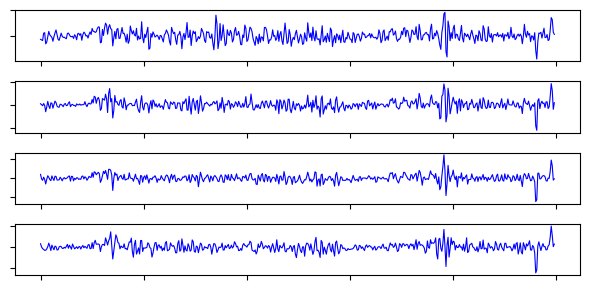

In [55]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 3))
for i in range(4):
    axs[i].plot(100*dx_train_sub[:-1, i], lw = 0.8, c="blue")
    #axs[i].plot(100*z[1:,i], "-", label = 'Original')
    #axs[i].legend()
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    # for val in np.arange(0,500,50):
    #     axs[i].axvline(x=val, color='blue', linestyle='--')
plt.tight_layout()
#fig.savefig("Figures/derivative_show.png", dpi = 300)

In [56]:
data=data[:576,:]

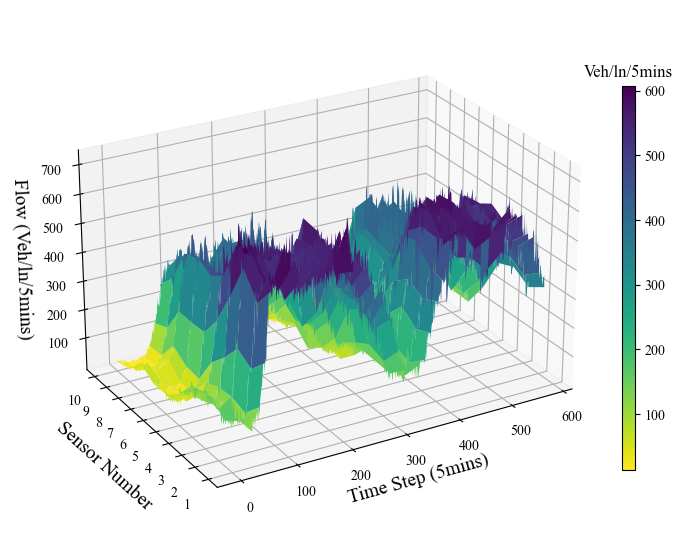

In [59]:
plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(7, 8))
ax = plt. axes(projection = '3d')
x = np.arange(data.shape[0])
y = np.arange(data.shape[1])+1
X, Y = np.meshgrid(x, y)
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom_cmap', ['#d7d7d7', '#ac83b8'])
surf = ax.plot_surface(X, Y, data.T,cmap='viridis_r',linewidth=0, antialiased=True)
ax.set_box_aspect([1, 0.7, 0.6])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.view_init(elev=25, azim=240)
ax.set_xlabel('Time Step (5mins)', fontsize = 14)
ax.set_ylabel('Sensor Number', fontsize = 14)
ax.set_zlabel('Flow (Veh/ln/5mins)', fontsize = 14)
clb = fig.colorbar(surf, shrink=0.5, aspect=30)
clb.ax.set_title("Veh/ln/5mins", fontsize = 12)
plt.tight_layout()
plt.show()
fig.savefig("Figures/raw_data.png", dpi = 300)

In [11]:
proposed_predicted = np.load('Pred_Results/one_step_pred_proposed.npy')
proposed_true = np.load('Pred_Results/z.npy')

proposed_predicted_2 = np.load('Pred_Results/two_step_pred_proposed.npy')
#proposed_true = np.load('Pred_Results/z.npy')

In [12]:
with open('Results/final_output.pkl', 'rb') as f:
    results = pickle.load(f)
X_ori = results['x'].cpu().detach().numpy()
measured_index = [i*params['embedding_dimension'] for i in range(params['partial_measurement'])]
X_ori = X_ori[:, measured_index]

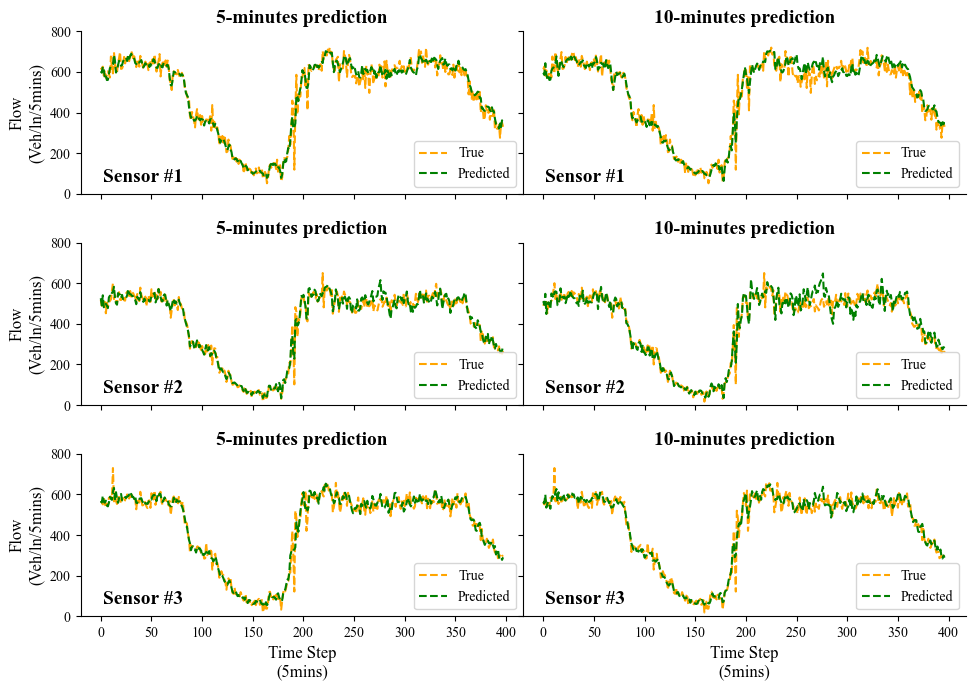

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 7),sharex=True, sharey=True)

# Plot each column in a separate subplot

for row in range(3):
    axs[row, 0].plot(100*X_ori[1:,row], "--", color = 'orange', label = 'True')
    axs[row, 0].plot(100*proposed_predicted[:-1, row], "--", color = 'green', label= "Predicted")
    axs[row, 0].set_ylim([0, 800])
    axs[row, 0].legend(loc='lower right', fontsize='medium')
    axs[row, 0].text(0.05, 0.05, f'Sensor #{(row)+1}', transform=axs[row, 0].transAxes, va='bottom', ha='left', fontsize = 14, weight='bold')
    axs[row, 0].set_title("5-minutes prediction", fontsize = 14, weight ='bold')
    #axs[row, 0].text(0.05, 0.95, '5-minutes prediction', transform=axs[row, 0].transAxes, va='top', ha='left', fontsize = 12, weight='bold')
    axs[row, 0].spines['top'].set_visible(False)
    axs[row, 0].spines['right'].set_visible(False)



for row in range(3):
    axs[row, 1].plot(100*X_ori[2:,row], "--", color = 'orange', label = 'True')
    axs[row, 1].plot(100*proposed_predicted_2[:-2, row], "--", color = 'green', label= "Predicted")
    axs[row, 1].set_ylim([0, 800])
    axs[row, 1].legend(loc='lower right', fontsize='medium')
    axs[row, 1].text(0.05, 0.05, f'Sensor #{(row)+1}', transform=axs[row, 1].transAxes, va='bottom', ha='left', fontsize = 14, weight='bold')
    #axs[row, 1].text(0.05, 0.95, '10-minutes prediction', transform=axs[row, 1].transAxes, va='top', ha='left', fontsize = 12, weight='bold')
    axs[row, 1].set_title("10-minutes prediction", fontsize = 14, weight ='bold')
    axs[row, 1].spines['top'].set_visible(False)
    axs[row, 1].spines['right'].set_visible(False)


for row in range(3):
    axs[row, 0].set_ylabel("Flow\n(Veh/ln/5mins)", fontsize = 12)

axs[2, 0].set_xlabel('Time Step\n(5mins)',  fontsize = 12)
axs[2, 1].set_xlabel('Time Step\n(5mins)',  fontsize = 12)
#fig.text(0.03, 0.87, 'Original DMD', ha='center', va='center', rotation='vertical')
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.subplots_adjust(left=0.1)
plt.show()
fig.savefig("Figures/Prediction_Plots_Proposed_Method.png",dpi=300)

In [12]:
from data_loader import data_loader
from utils import params

In [13]:
x_train, dx_train, x_valid, dx_valid = data_loader(params)

In [14]:
x_train = x_train * 100

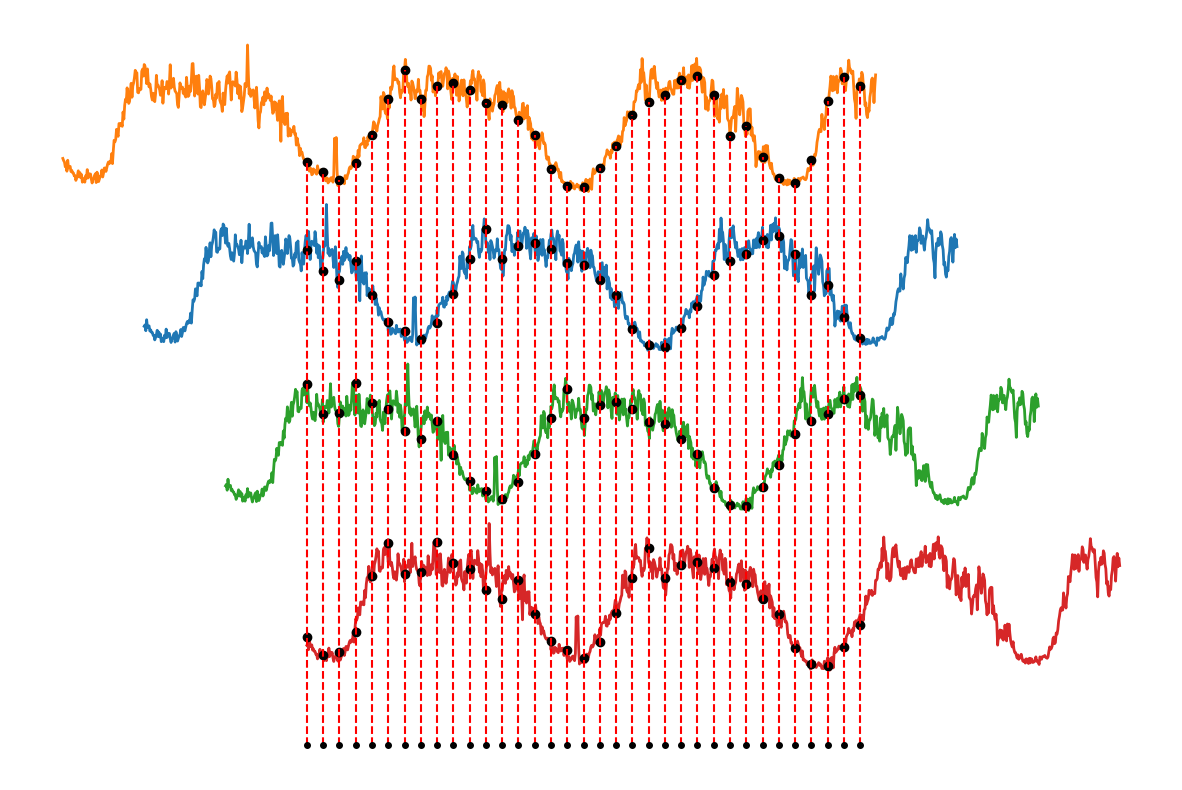

In [79]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(15, 10))


highlight_x = [val for val in range(300, 1000, 20)]
highlight_y = x_train[highlight_x, 0]
highlight_x_1 = [val for val in range(200, 900, 20)]
highlight_y_1 = x_train[highlight_x_1, 0]-800

highlight_x_2 = [val for val in range(100, 800, 20)]
highlight_y_2 = x_train[highlight_x_2, 0]-1600

highlight_x_3 = [val for val in range(0, 700, 20)]
highlight_y_3 = x_train[highlight_x_3, 0]-2400
#for i in range(10)
plt.plot(x_train[:1000,0],"-",color = '#ff7f0e', lw = 2)
# plt.plot(x_train[:1000,1]-200, "-")
# plt.plot(x_train[:1000,2]-400, "-")
plt.plot(range(100, 100 + len(x_train[:1000,0])),x_train[:1000,3]-800, "-", color = "#1f77b4", lw = 2)
plt.plot(range(200, 200 + len(x_train[:1000,0])),x_train[:1000,3]-1600, "-", color = '#2ca02c', lw = 2)
plt.plot(range(300, 300 + len(x_train[:1000,0])),x_train[:1000,3]-2400, "-", color = '#d62728', lw = 2)
# plt.plot(x_train[:1000,4]-800, "-")
# plt.plot(x_train[:1000,5]-1000, "-")
plt.plot(highlight_x, highlight_y, marker='o', linestyle='None', color='black', label='Highlighted Points')
plt.plot(highlight_x, highlight_y_1, marker='o', linestyle='None', color='black', label='Highlighted Points')
plt.plot(highlight_x, highlight_y_2, marker='o', linestyle='None', color='black', label='Highlighted Points')
plt.plot(highlight_x, highlight_y_3, marker='o', linestyle='None', color='black', label='Highlighted Points')
for i in range(len(highlight_x)):
    plt.vlines(highlight_x[i], -2700, highlight_y[i], linestyle='--', color='red')

text = 'Time Delay Embedding'
plt.plot(highlight_x, np.zeros(len(highlight_x))-2700, marker='o',markersize = 4, linestyle='None', color='black')
# plt.text(320, -1000, text, fontsize = 30, weight='bold', bbox=dict(facecolor='none', edgecolor='none'))


# plt.plot(x_train[:,2],"--")
# plt.plot(x_train[:,9],"--")
plt.axis('off')
plt.savefig("Figures/delay_illustration.png",dpi=300)

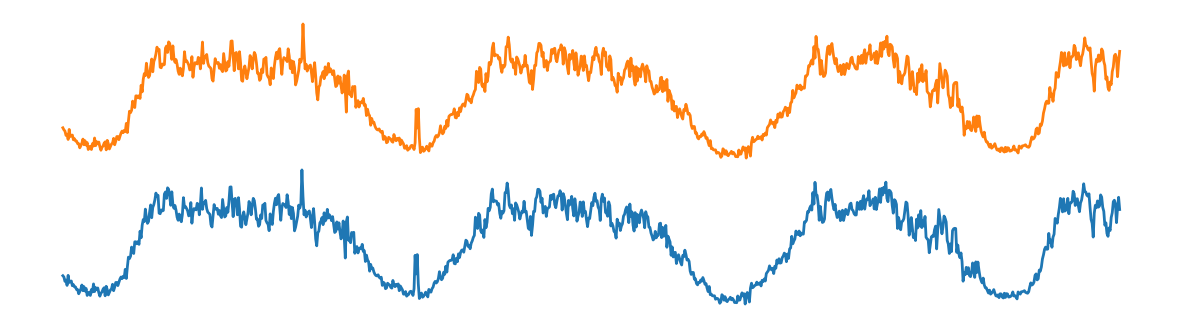

In [87]:
plt.figure(figsize=(15, 4))
plt.plot(x_train[:1000,0],"-",color = '#ff7f0e', lw = 2)
plt.plot(x_train[:1000,1]-800, "-", color = "#1f77b4", lw = 2)
plt.axis('off')
plt.savefig("Figures/original_illustration.png",dpi=300)

# New 10 stations

In [21]:
data = np.load("Data/X.npy")

In [22]:
data = data[:,[109,146,129,49,2,79,28,85,132,108]]

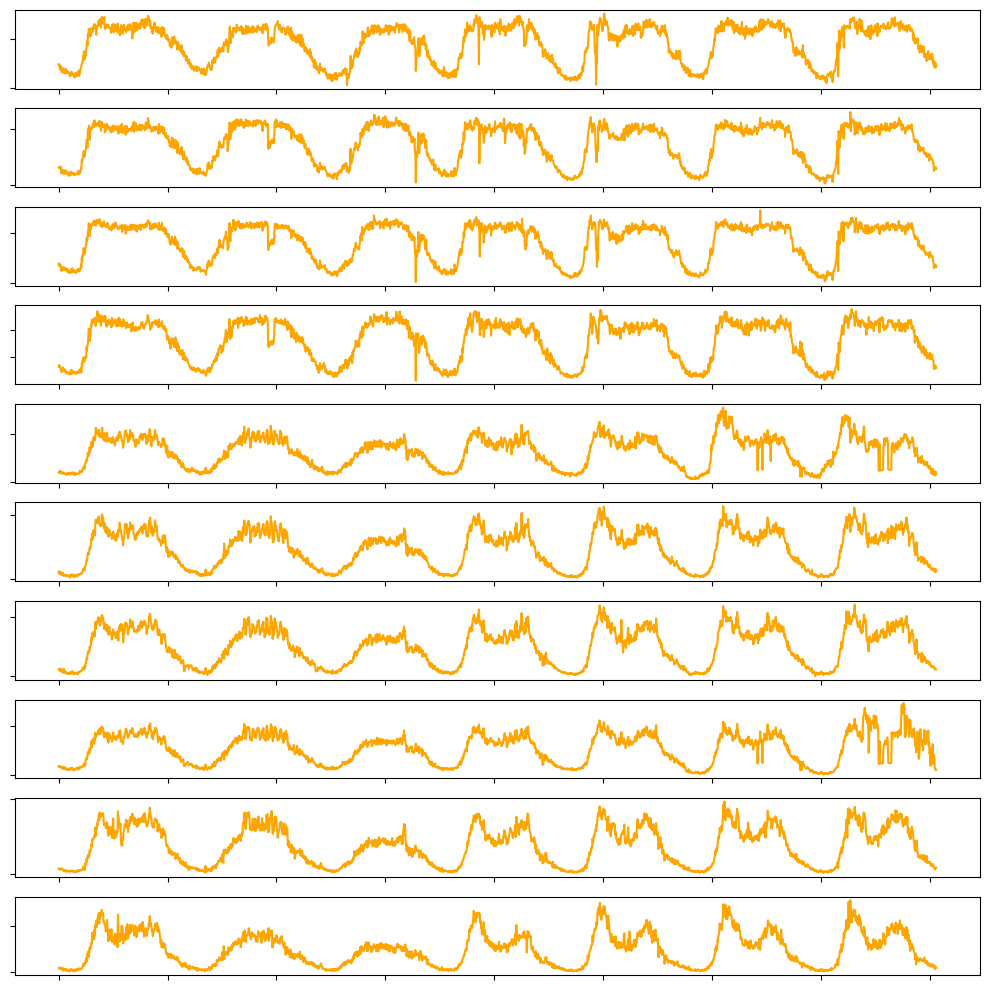

In [25]:
fig, axs = plt.subplots(nrows=data.shape[1], ncols=1, figsize=(10, 10))
for i in range(data.shape[1]):
    axs[i].plot(data[:,i], c="orange")
    #axs[i].plot(100*z[1:,i], "-", label = 'Original')
    #axs[i].legend()
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    # for val in np.arange(0,500,50):
    #     axs[i].axvline(x=val, color='blue', linestyle='--')
plt.tight_layout()

In [27]:
np.save("Data/X_red_10stations.npy", data)